# Случайный лес

В этом практическом задании вы решите задачу регрессии на реальных данных при помощи линейной модели и случайного леса. 

## Цели практической работы

* Научиться применять случайный лес в задаче регрессии.
* Научиться сравнивать качество случайного леса с качеством линейной модели.
* Научиться настраивать гиперпараметры леса.

## Что входит в работу

* Выполнить предобработку данных.
* Обучить линейную регрессию на данных задачи.
* Обучить случайный лес на данных задачи.
* Подобрать гиперпараметры для леса.
* Визуализировать важность признаков у леса.

## Что оценивается

*  Все ячейки заполнены; при запуске ячеек  Python не выдаёт информацию об ошибках.
*  Качество итоговой модели $R^2$ превышает 0,95.


## Что нужно сделать

Постройте модели, предсказывающие стоимость автомобилей по характеристикам.

Признаков у машин много, но в этой работе обойдёмся только числовыми признаками:
*  year — год производства автомобиля;
*  km_driven — пробег;
*  seats — количество посадочных мест;
*  mileage — другая характеристика пробега;
*  engine — мощность двигателя;
*  max_power — мощность автомобиля.

Целевая переменная — selling_price.

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("cars_train.csv")
test = pd.read_csv("cars_test.csv")

In [2]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [3]:
train.info()
# видно колумбы mileage, engine, max_power  относится к типу object. На до их переобразовать на float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6998 non-null   object 
 1   year           6699 non-null   float64
 2   selling_price  6699 non-null   float64
 3   km_driven      6699 non-null   float64
 4   fuel           6699 non-null   object 
 5   seller_type    6699 non-null   object 
 6   transmission   6699 non-null   object 
 7   owner          6699 non-null   object 
 8   mileage        6497 non-null   object 
 9   engine         6497 non-null   object 
 10  max_power      6503 non-null   object 
 11  torque         6497 non-null   object 
 12  seats          6497 non-null   float64
dtypes: float64(4), object(9)
memory usage: 710.9+ KB


In [4]:
train = train.dropna(subset=["selling_price"])
train.info()
#Удаляем пропуски 

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6997
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6699 non-null   object 
 1   year           6699 non-null   float64
 2   selling_price  6699 non-null   float64
 3   km_driven      6699 non-null   float64
 4   fuel           6699 non-null   object 
 5   seller_type    6699 non-null   object 
 6   transmission   6699 non-null   object 
 7   owner          6699 non-null   object 
 8   mileage        6497 non-null   object 
 9   engine         6497 non-null   object 
 10  max_power      6503 non-null   object 
 11  torque         6497 non-null   object 
 12  seats          6497 non-null   float64
dtypes: float64(4), object(9)
memory usage: 732.7+ KB


In [5]:
# df = train.select_dtypes(include=['float64']).columns.tolist()
# y = train["selling_price"]
# X = train[df]

Создайте объекты Xtrain, ytrain, Xtest, ytest. Запишите в них матрицы «объект — признак» и векторы целевой переменной для тренировочного и тестового датасетов.

In [6]:
# Ваш код здесь
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=["selling_price"]), train["selling_price"], test_size=0.1, random_state=42)

В тренировочных данных есть автомобили, для которых неизвестна стоимость. Удалите эти автомобили из трейна.

In [7]:
y_train.isna().sum()

0

In [8]:
# Ваш код здесь
y_train.isna().sum()
# Да их 271 штук
y_train = y_train.dropna()
y_test = y_test.dropna()

Перед обучением моделей обработайте данные.

Обратите внимание, что столбцы mileage, engine и max_power по смыслу числовые. Чтобы превратить их в числовые столбцы, отбросьте единицы измерения и оставьте только числа. В столбцах есть пропущенные значения, их при обработке трогать не нужно.

In [9]:
# Ваш код здесь
#X_train = X_train.dropna(subset=["mileage", "engine", "max_power"])
X_train["mileage"] = X_train["mileage"].apply(lambda x: x.split()[0] if not pd.isnull(x) else pd.NA)
X_train["engine"] = X_train["engine"].apply(lambda x: x.split()[0] if not pd.isnull(x) else pd.NA ) 
X_train["max_power"] = X_train["max_power"].apply(lambda x: x.split()[0] if not pd.isnull(x) else pd.NA)
X_test["mileage"] = X_test["mileage"].apply(lambda x: x.split()[0] if not pd.isnull(x) else pd.NA)
X_test["engine"] = X_test["engine"].apply(lambda x: x.split()[0] if not pd.isnull(x) else pd.NA ) 
X_test["max_power"] = X_test["max_power"].apply(lambda x: x.split()[0] if not pd.isnull(x) else pd.NA)
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
838,Hyundai Getz GLS,2005.0,85000.0,Petrol,Individual,Manual,First Owner,15.3,1341,83,115Nm@ 3200rpm,5.0
4797,Ford Figo Aspire 1.5 TDCi Titanium,2015.0,70000.0,Diesel,Individual,Manual,First Owner,25.83,1498,99,215Nm@ 1750-3000rpm,5.0
896,Mahindra KUV 100 G80 K8,2018.0,6000.0,Petrol,Individual,Manual,First Owner,18.15,1198,82,115Nm@ 3500-3600rpm,6.0
3255,Maruti Baleno Sigma 1.3,2016.0,58000.0,Diesel,Individual,Manual,First Owner,27.39,1248,74,190Nm@ 2000rpm,5.0
1987,Maruti Swift Ldi BSIII,2007.0,150000.0,Diesel,Individual,Manual,Fourth & Above Owner,17.8,1248,75,190Nm@ 2000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3925,Skoda Fabia Scout 1.2 TDI,2012.0,110000.0,Diesel,Individual,Manual,First Owner,21.0,1199,75,180Nm@ 2000rpm,5.0
5421,Mahindra XUV500 W8 2WD,2014.0,90000.0,Diesel,Individual,Manual,First Owner,15.1,2179,140,330Nm@ 1600-2800rpm,7.0
5460,Hyundai Xcent 1.2 VTVT S,2017.0,90000.0,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5.0
5627,Mahindra Verito 1.5 D2 BSIII,2011.0,215000.0,Diesel,Individual,Manual,First Owner,21.0,1461,64.1,160Nm@ 2000rpm,5.0


Оставьте в данных только шесть числовых столбцов:

year, km_driven, seats, engine, mileage, max_power

In [10]:
# Ваш код здесь
numeric_columns = ["year", "km_driven", "seats", "engine", "mileage", "max_power"]
X_train = X_train[numeric_columns]
X_test = X_test[numeric_columns]
X_train

,year,km_driven,seats,engine,mileage,max_power
838,2005.0,85000.0,5.0,1341,15.3,83
4797,2015.0,70000.0,5.0,1498,25.83,99
896,2018.0,6000.0,6.0,1198,18.15,82
3255,2016.0,58000.0,5.0,1248,27.39,74
1987,2007.0,150000.0,5.0,1248,17.8,75
...,...,...,...,...,...,...
3925,2012.0,110000.0,5.0,1199,21.0,75
5421,2014.0,90000.0,7.0,2179,15.1,140
5460,2017.0,90000.0,5.0,1197,20.14,81.86
5627,2011.0,215000.0,5.0,1461,21.0,64.1


Теперь заполните пропуски следующим образом:

*    вычислите средние значения по столбцам тренировочной выборки;

*    добавьте в пропуски в тренировочных и тестовых данных вычисленные средние.

In [11]:
# Ваш код здесь
X_train.year.fillna(int(X_train.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
X_train.km_driven.fillna(int(X_train.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
X_train.seats.fillna(int(X_train.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
X_train.engine.fillna(int(X_train.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
X_train.mileage.fillna(int(X_train.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
X_train.max_power.fillna(int(X_train.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам

C:\Users\user\AppData\Local\Temp\ipykernel_4492\417273017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train.year.fillna(int(X_train.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
C:\Users\user\AppData\Local\Temp\ipykernel_4492\417273017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.year.f

In [12]:
X_test.year.fillna(int(X_test.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
X_test.km_driven.fillna(int(X_test.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
X_test.seats.fillna(int(X_test.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
X_test.engine.fillna(int(X_test.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
X_test.mileage.fillna(int(X_test.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
X_test.max_power.fillna(int(X_test.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам

C:\Users\user\AppData\Local\Temp\ipykernel_4492\906010377.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test.year.fillna(int(X_test.year.mean()), inplace=True)  # Заменяем нан на средними значениями по столбцам
C:\Users\user\AppData\Local\Temp\ipykernel_4492\906010377.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [13]:
X_train.isna().sum()

year         0
km_driven    0
seats        0
engine       0
mileage      0
max_power    0
dtype: int64

In [14]:
X_test.isna().sum()

year         0
km_driven    0
seats        0
engine       0
mileage      0
max_power    0
dtype: int64

Теперь на обработанных тренировочных данных обучите:

*  линейную регрессию,
*  случайный лес с параметрами по умолчанию.

На обработанных тестовых данных сделайте предсказание и вычислите метрику $R^2$. 

In [15]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
rf = RandomForestRegressor()
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor()

Какая модель получилась лучше?

In [16]:
# Ваш ответ здесь
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
lr_score = lr.score(X_test, y_test)
rf_score = rf.score(X_test, y_test)
print(lr_score, " = lr_pred")
print(rf_score, " = rf_pred")

-0.07287812781194014  = lr_pred
0.973523665630122  = rf_pred


для этого датасета рандом форест хорош (0,97)

Улучшите качество предсказания случайного леса путём подбора гиперпараметров:

*   n_estimators,
*   max_depth,
*   max_features,
*   min_samples_leaf,
*   min_samples_split.

Для подбора гиперпараметров используйте GridSearchCV. Обучайте GridSearchCV по тренировочным данным с разбивкой на три фолда и метрикой $R^2$.

In [17]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Определяем модель случайного леса
model = RandomForestRegressor(random_state=42)

# Определяем диапазоны гиперпараметров для подбора
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Определяем GridSearchCV с метрикой R2 и 3 фолдами
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=make_scorer(r2_score),
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Обучаем GridSearchCV на тренировочных данных
grid_search.fit(X_train, y_train)

# Получаем лучшие параметры и наилучшее значение R2
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Наилучшее значение R2 на кросс-валидации:", best_score)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Лучшие параметры: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Наилучшее значение R2 на кросс-валидации: 0.9519348333788117


Теперь обучите на тренировочных данных случайный лес с найденными гиперпараметрами. Сделайте предсказание на тестовых данных и оцените его качество ($R^2$).

In [21]:
# Ваш код здесь
model = grid_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rf_r2_score = r2_score(y_test, y_pred) 

In [22]:
rf_r2_score

0.9737929474331039

Модель готова. Осталось её проинтерпретировать.

При помощи метода model.feature_importances_ визуализируйте гистограмму важности признаков у случайного леса с настроенными гиперпараметрами.

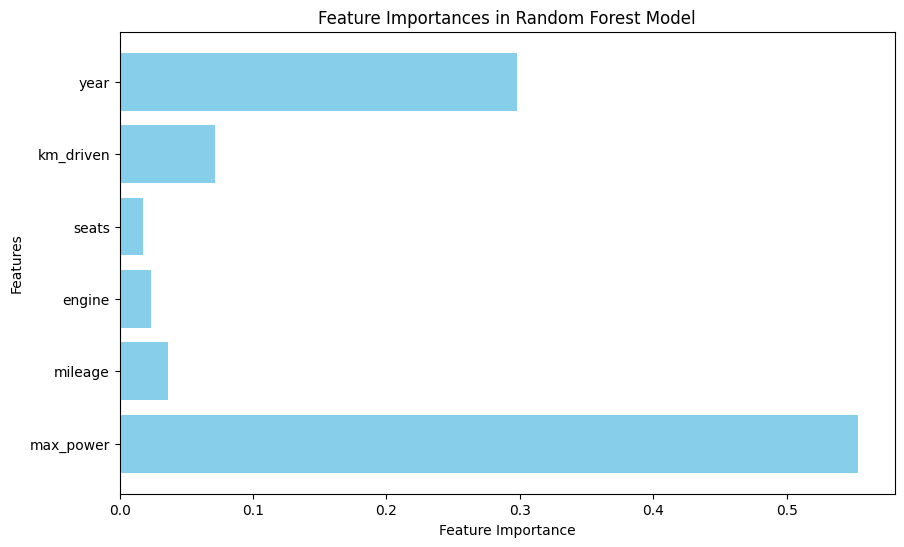

In [24]:
# Ваш код здесь
import matplotlib.pyplot as plt
import numpy as np

# Получаем модель с лучшими параметрами из GridSearchCV
best_model = grid_search.best_estimator_

# Получаем значения важности признаков
feature_importances = best_model.feature_importances_

# Предположим, что у нас есть список названий признаков
feature_names = X_train.columns

# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in Random Forest Model")
plt.gca().invert_yaxis()  # Инвертируем ось, чтобы важные признаки были сверху
plt.show()

In [ ]:
На основании гистограммы важности признаков для модели случайного леса можно сделать следующие выводы:

Наиболее значимые признаки:

Признак max_power имеет наибольшую важность среди всех признаков, что указывает на его значительное влияние на целевую переменную. Модель полагается на него больше всего при построении предсказаний.
Признак year также важен, занимая второе место по значимости. Это может означать, что модель учитывает возраст объекта (вероятно, автомобиля) как важный фактор для предсказания целевой переменной.
Средняя значимость:

Признак km_driven имеет умеренную важность, что свидетельствует о его влиянии, но в меньшей степени, чем max_power и year.
Менее значимые признаки:

Признаки mileage, engine и seats имеют низкую значимость, что может указывать на их слабое влияние на целевую переменную. Возможно, они не содержат достаточно информации для существенного улучшения точности предсказания.
Заключение
В модели случайного леса признаки max_power и year играют решающую роль в предсказаниях, тогда как остальные признаки оказывают лишь слабое влияние. Возможно, для упрощения модели и предотвращения переобучения можно рассмотреть исключение менее значимых признаков или уделить внимание их улучшению.